## Load the dataset

In [23]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
data1 = pd.read_csv("../data/dataset.csv")

In [25]:
# lets take a look at the first five rows
data1.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [26]:
data1.shape #check the number of rows and columns 

(1177, 51)

In [27]:
# lets take a look at the column list 
data1.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

### Data Wrangling Function

In [40]:
def wrangle(df):
    df = df.copy()
    # Since this is for practice i would reduce the number of columns 
    df = df[['age', 'BMI', 'atrialfibrillation', 'Systolic blood pressure', 'Diastolic blood pressure', 'diabetes',
             'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'PT', 'INR', 'Anion gap', 'PCO2', 'PH', 'Bicarbonate',
             'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'outcome']]
    
    # Create a new feature 'Hypertensive'
    df['Hypertensive'] = (df['Systolic blood pressure'] >= 140) | (df['Diastolic blood pressure'] >= 90)
    
    # Categorical binning
    age_bins = [0, 30, 60, 100]
    age_labels = ['young', 'middle-aged', 'elderly']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    
    bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
    bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
    df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
    
    df = df.dropna(subset=['outcome'])
    
    return df

In [41]:
df = wrangle(data1)

In [42]:
df.nunique()

age                           68
BMI                          933
atrialfibrillation             2
Systolic blood pressure     1102
Diastolic blood pressure    1077
diabetes                       2
Respiratory rate            1004
temperature                  775
SP O2                        866
Urine output                 810
PT                           783
INR                          425
Anion gap                    486
PCO2                         464
PH                           413
Bicarbonate                  657
NT-proBNP                   1146
Creatine kinase              690
Creatinine                   728
Urea nitrogen                925
outcome                        2
Hypertensive                   2
age_group                      3
BMI_category                   4
dtype: int64

In [43]:
#check the descriptive statistics
df.describe()

,age,BMI,atrialfibrillation,Systolic blood pressure,Diastolic blood pressure,diabetes,Respiratory rate,temperature,SP O2,Urine output,...,INR,Anion gap,PCO2,PH,Bicarbonate,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,outcome
count,1176.000000,962.000000,1176.000000,1161.000000,1161.000000,1176.000000,1164.000000,1158.000000,1164.000000,1141.000000,...,1156.000000,1176.000000,883.000000,885.000000,1176.000000,1176.000000,1011.000000,1176.000000,1176.000000,1176.000000
mean,74.047619,30.188278,0.451531,117.995035,59.534497,0.420918,20.801511,36.677286,96.272900,1899.276512,...,1.626064,13.923755,45.535382,7.378532,26.912116,11011.039612,246.941046,1.640661,36.293574,0.135204
std,13.437241,9.325997,0.497857,17.367618,10.684681,0.493917,4.002987,0.607558,2.298002,1272.363631,...,0.834150,2.653463,12.711271,0.067320,5.169696,13153.830715,1485.248525,1.277996,21.860208,0.342087
min,19.000000,13.346801,0.000000,75.000000,24.736842,0.000000,11.137931,33.250000,75.916667,0.000000,...,0.871429,6.636364,18.750000,7.090000,12.857143,50.000000,8.000000,0.266667,5.357143,0.000000
25%,65.000000,24.326461,0.000000,105.391304,52.173913,0.000000,17.925694,36.286045,95.000000,980.000000,...,1.140000,12.250000,37.038462,7.334615,23.452020,2250.000000,46.000000,0.940000,20.833333,0.000000
50%,77.000000,28.312474,0.000000,116.128205,58.461538,0.000000,20.372308,36.650794,96.452273,1675.000000,...,1.300000,13.666667,43.000000,7.380000,26.500000,5837.750000,89.500000,1.285417,30.611111,0.000000
75%,85.000000,33.633509,1.000000,128.625000,65.464286,1.000000,23.391200,37.021991,97.917500,2500.000000,...,1.736364,15.404167,50.585784,7.430000,29.881250,14980.750000,185.375000,1.894643,45.255682,0.000000
max,99.000000,104.970366,1.000000,203.000000,107.000000,1.000000,40.900000,39.132478,100.000000,8820.000000,...,8.342857,25.500000,98.600000,7.580000,47.666667,118928.000000,42987.500000,15.527273,161.750000,1.000000


In [44]:
#check the data type of each column and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1176
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1176 non-null   int64   
 1   BMI                       962 non-null    float64 
 2   atrialfibrillation        1176 non-null   int64   
 3   Systolic blood pressure   1161 non-null   float64 
 4   Diastolic blood pressure  1161 non-null   float64 
 5   diabetes                  1176 non-null   int64   
 6   Respiratory rate          1164 non-null   float64 
 7   temperature               1158 non-null   float64 
 8   SP O2                     1164 non-null   float64 
 9   Urine output              1141 non-null   float64 
 10  PT                        1156 non-null   float64 
 11  INR                       1156 non-null   float64 
 12  Anion gap                 1176 non-null   float64 
 13  PCO2                      883 non-null    float64 
 1

In [45]:
#check for the porportion of all the null values
df.isnull().sum() / len(df)

age                         0.000000
BMI                         0.181973
atrialfibrillation          0.000000
Systolic blood pressure     0.012755
Diastolic blood pressure    0.012755
diabetes                    0.000000
Respiratory rate            0.010204
temperature                 0.015306
SP O2                       0.010204
Urine output                0.029762
PT                          0.017007
INR                         0.017007
Anion gap                   0.000000
PCO2                        0.249150
PH                          0.247449
Bicarbonate                 0.000000
NT-proBNP                   0.000000
Creatine kinase             0.140306
Creatinine                  0.000000
Urea nitrogen               0.000000
outcome                     0.000000
Hypertensive                0.000000
age_group                   0.000000
BMI_category                0.181973
dtype: float64

In [46]:
#check the number of possible outcome
df["outcome"].value_counts()

outcome
0.0    1017
1.0     159
Name: count, dtype: int64

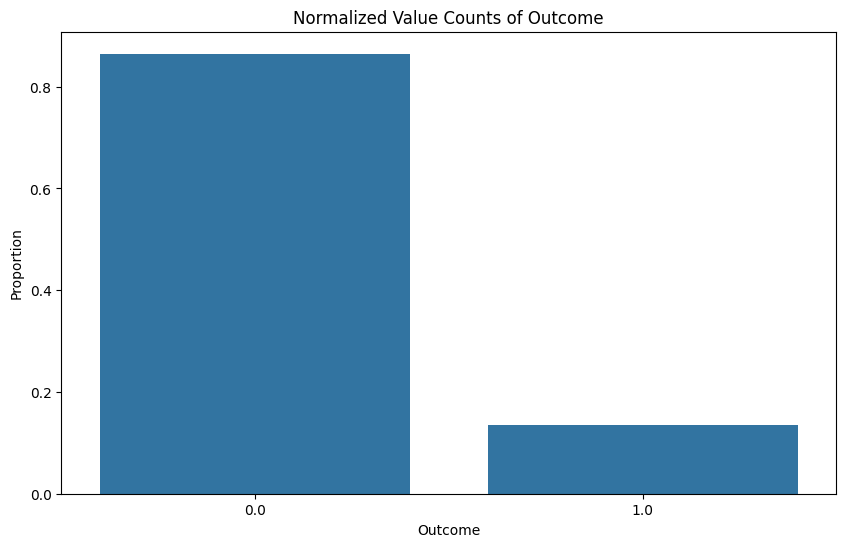

In [47]:
normalized_counts = df["outcome"].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_counts.index, y=normalized_counts.values)
plt.title('Normalized Value Counts of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.show()

In [48]:
df_features = df.drop(columns=['outcome'])

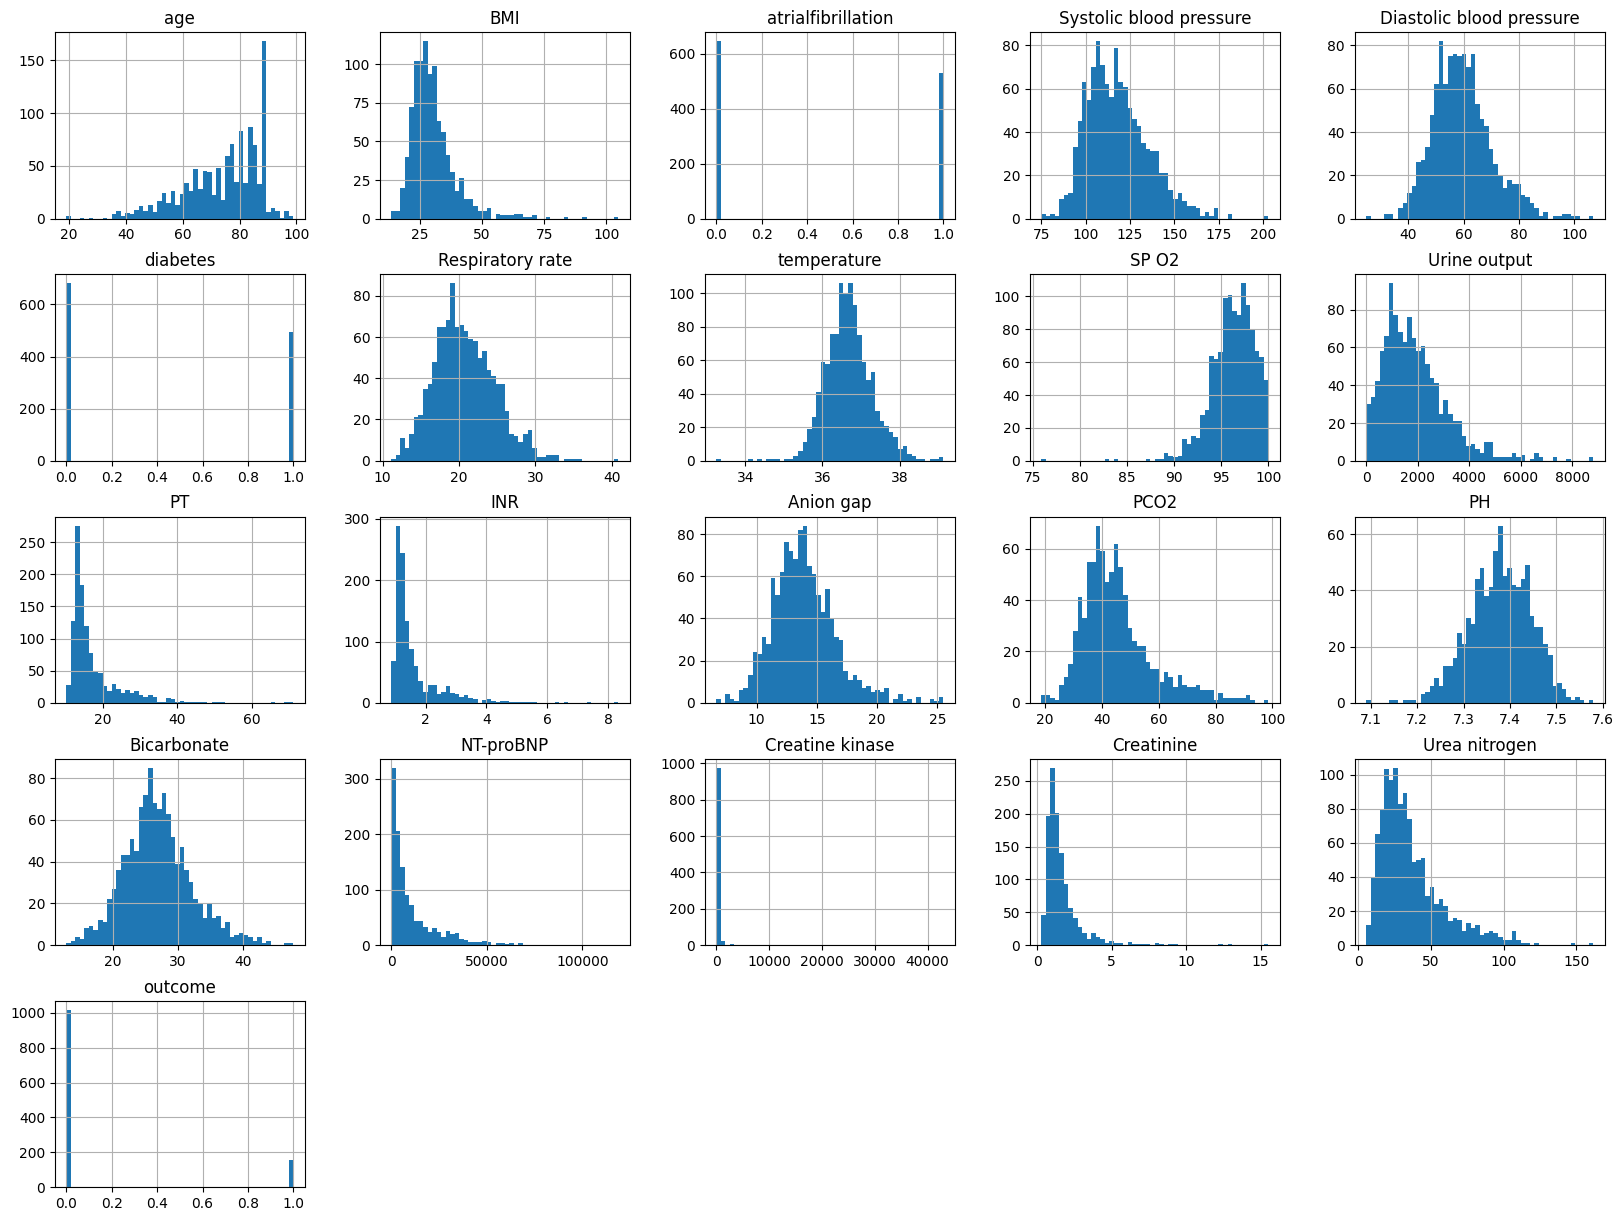

In [49]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [50]:
# Ensure that the outcome column is numeric
df['outcome'] = pd.to_numeric(df['outcome'], errors='coerce')

# Drop categorical columns and any rows with NaN values
numerical_df = df.select_dtypes(include=[np.number]).dropna()

# Compute correlation with the target variable
target_correlation = numerical_df.corr()

# Sort the correlation values with respect to the target variable
target_correlation["outcome"].sort_values(ascending=False)


outcome                     1.000000
Anion gap                   0.277369
Urea nitrogen               0.269878
NT-proBNP                   0.172500
INR                         0.159646
Respiratory rate            0.158547
PT                          0.157961
age                         0.112278
Creatine kinase             0.094744
atrialfibrillation          0.062376
Creatinine                  0.060398
diabetes                   -0.008068
PCO2                       -0.046483
SP O2                      -0.048903
Diastolic blood pressure   -0.082720
BMI                        -0.099864
Systolic blood pressure    -0.107973
temperature                -0.141555
PH                         -0.169321
Urine output               -0.190847
Bicarbonate                -0.231111
Name: outcome, dtype: float64

#### Now that we have the processed data let save the data and use it to build 

In [51]:
df.to_csv('../data/processed_df.csv', index=False)

## Build the model

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
# Example of loading data (replace with your data source)
data = pd.read_csv('../data/processed_df.csv')

# Separate features and target variable
X = data.drop('outcome', axis=1)
y = data['outcome']

In [72]:
data.iloc[21]

age                                78
BMI                         37.851434
atrialfibrillation                  0
Systolic blood pressure     95.444444
Diastolic blood pressure    60.259259
diabetes                            1
Respiratory rate                21.75
temperature                  36.12037
SP O2                       94.384615
Urine output                   1766.0
PT                               14.2
INR                               1.2
Anion gap                   12.545455
PCO2                             52.0
PH                           7.333333
Bicarbonate                 26.363636
NT-proBNP                     24440.0
Creatine kinase                  24.0
Creatinine                        1.3
Urea nitrogen               32.727273
outcome                           1.0
Hypertensive                    False
age_group                     elderly
BMI_category                    obese
Name: 21, dtype: object

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  # Add the StandardScaler here
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')), 
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create the final pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=6000))
])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'BMI', 'atrialfibrillation', 'Systolic blood pressure',
       'Diastolic blood pressure', 'diabetes', 'Respiratory rate',
       'temperature', 'SP O2', 'Urine output', 'PT', 'INR', 'Anion gap',
       'PCO2', 'PH', 'Bicarbonate', 'NT-proBNP', 'Creatine kinase',
       'Creatinine', 'Urea nitrogen', 'Hypertensive'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'BMI_category'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=6000))])

In [57]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8640226628895185
Confusion Matrix:
 [[294   5]
 [ 43  11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       299
         1.0       0.69      0.20      0.31        54

    accuracy                           0.86       353
   macro avg       0.78      0.59      0.62       353
weighted avg       0.84      0.86      0.83       353



### From the report: The model struggles with the minority class (1.0), having low recall and F1-score.
We would do the hyperparameter tuning when we do the experiment tracking but for now let us save the model

### Save the model

In [58]:
import pickle

In [59]:
with open("model/model.pkl", "wb") as f_out:
    pickle.dump(pipeline, f_out)